## Mobility of a sedimenting lattice as a function of volume fraction

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import solvePeriodic
import periodic_1_4 as me
from math import *
PI = 3.14159265359

In [2]:
#Parameters
Np=1
b, eta, dim = 1.0, 1.0/6, 3
ta =(4*np.pi/3)**(1.0/3) 
L = ta/np.asarray([0.1, 0.3, 0.4, 0.5, 0.6, 0.7])

# Memory allocation
v = np.zeros(dim*Np)      
o = np.zeros(dim*Np)  
r = np.zeros(dim*Np)        
F = np.zeros(dim*Np)
T = np.zeros(dim*Np)  
vv  = np.zeros(np.size(L))
phi = np.zeros(np.size(L) )

S = np.zeros(Np*5)
D = np.zeros(Np*3)

mu=1.0/(6*np.pi*eta*b)

In [3]:
dimH=20
dim2s=5
VH = np.zeros(dimH)

KHHVH = np.zeros([dimH])
GH1sF = np.zeros([dimH])
GH2aT = np.zeros([dimH])

F[0] = 0.0
F[1] = 0.0 
F[2] = -1  ## gravity 

VH[0:dim2s]  = S
VH[dim2s:dim2s+3]  = D


v after G1s1sF:  [-5.93051636e-12 -5.93051636e-12 -8.52548180e-02]
v after G1sHFH:  [-5.88747742e-12 -5.88747742e-12 -8.52533999e-02]

v after G1s1sF:  [ 8.07738035e-11  8.07738035e-11 -1.29708762e-01]
v after G1sHFH:  [ 5.10117215e-11  5.10117215e-11 -1.29472407e-01]

v after G1s1sF:  [ 2.22691316e-10  2.22691316e-10 -2.58800432e-02]
v after G1sHFH:  [ 9.36692323e-11  9.36692323e-11 -2.58713808e-02]

v after G1s1sF:  [4.63174181e-10 4.63174181e-10 2.04004368e-01]
v after G1sHFH:  [1.82300036e-09 1.82300036e-09 2.10234852e-01]

v after G1s1sF:  [8.26863737e-10 8.26863737e-10 5.91458393e-01]
v after G1sHFH:  [1.54025616e-07 1.54025616e-07 1.39906875e+00]

v after G1s1sF:  [1.33840132e-09 1.33840132e-09 1.16799595e+00]
v after G1sHFH:  [-3.64900481e-08 -3.64900481e-08  9.47258653e-01]


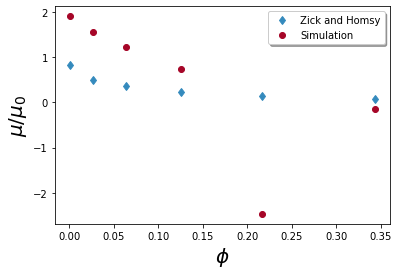

volume fraction   simulation	 Zick & Homsy (1982)
0.001		  1.906		 0.825	
0.027		  1.560		 0.498	
0.064		  1.232		 0.356	
0.125		  0.728		 0.233	
0.216		  -2.469		 0.134	
0.343		  -0.151		 0.065	


In [4]:
# Deafult value of xi = sqrt(pi)/L

S = np.zeros(Np*5)
D = np.zeros(Np*3)


for i in range(np.size(L)):
    v = v*0
    F = F*0

    r[0], r[1], r[2] = 0.0, 0.0, 0.0

    F[0] = 0.0
    F[1] = 0.0 
    F[2] = -1  ## gravity                           
    
    Rbm = solvePeriodic.Rbm(b, eta, L[i])   
    Rbm.krylovSolve(v, o, F, T, S, D)
    #print(v)
    
    phi[i] = (4*np.pi*b**3)/(3*L[i]**3)
    mu00 = mu*F[2]
    vv[i] = v[2]/mu00   
    

exR = [.825, .498, .356, .233, .134, .065]
plt.plot(phi, exR, 'd', color="#348ABD", label='Zick and Homsy')
plt.plot(phi, vv, 'o', color="#A60628", label='Simulation')

plt.xlabel(r'$\phi$', fontsize=20); plt.ylabel(r'$\mu/\mu_0$', fontsize=20)
plt.legend(loc='upper right', shadow=True); plt.show()

print ('volume fraction   simulation\t Zick & Homsy (1982)')
for i in range(np.size(L)):
    print ('%1.3f\t\t  %1.3f\t\t %1.3f\t'%(phi[i], vv[i], exR[i] ))

In [5]:
vv/exR

array([ 2.04988009,  2.61677955,  3.75070025,  6.79676497, 15.55713193,
       43.63284026])

In [ ]:
## why are there x and y velocities? FH creates equal x and y component for some reason. Symmetries not right? 
## If we implement the full system, have to try and get 2s & 3s modes via multiplication with Delta2 and Delta3, respectively. 

Only GR (real space Green's function) gives the following contributions to v from G1s1sF and (G1s1sF+)G1sHFH


v after G1s1sF:  [-3.10196860e-05 -3.10196860e-05 -1.69673964e-02]
v after G1sHFH:  [-4.01551994e-05 -4.01551994e-05 -1.69854506e-02]

v after G1s1sF:  [-0.00015682 -0.00015682 -0.04692267]
v after G1sHFH:  [-0.00056894 -0.00056894 -0.04767872]

v after G1s1sF:  [-0.00028348 -0.00028348 -0.0579208 ]
v after G1sHFH:  [-0.00089228 -0.00089228 -0.05859782]

v after G1s1sF:  [-0.0004739  -0.0004739  -0.06493941]
v after G1sHFH:  [-0.00072445 -0.00072445 -0.06197421]

v after G1s1sF:  [-0.00074401 -0.00074401 -0.06698362]
v after G1sHFH:  [-0.00135483 -0.00135483 -0.05026668]

v after G1s1sF:  [-0.00110977 -0.00110977 -0.06305857]
v after G1sHFH:  [-0.00807955 -0.00807955 -0.00369452]


Only GF (Fourier space Green's function) gives the following contributions to v from G1s1sF and (G1s1sF+)G1sHFH
         

v after G1s1sF:  [-5.93051636e-12 -5.93051636e-12 -8.52548180e-02]
v after G1sHFH:  [-5.88747742e-12 -5.88747742e-12 -8.52533999e-02]

v after G1s1sF:  [ 8.07738035e-11  8.07738035e-11 -1.29708762e-01]
v after G1sHFH:  [ 5.10117215e-11  5.10117215e-11 -1.29472407e-01]

v after G1s1sF:  [ 2.22691316e-10  2.22691316e-10 -2.58800432e-02]
v after G1sHFH:  [ 9.36692323e-11  9.36692323e-11 -2.58713808e-02]

v after G1s1sF:  [4.63174181e-10 4.63174181e-10 2.04004368e-01]
v after G1sHFH:  [1.82300036e-09 1.82300036e-09 2.10234852e-01]

v after G1s1sF:  [8.26863737e-10 8.26863737e-10 5.91458393e-01]
v after G1sHFH:  [1.54025616e-07 1.54025616e-07 1.39906875e+00]

v after G1s1sF:  [1.33840132e-09 1.33840132e-09 1.16799595e+00]
v after G1sHFH:  [-3.64900481e-08 -3.64900481e-08  9.47258653e-01]


Real space Green's function gives quite large errors, even for G1s1sF -- anything dodgy in the computation? 

Wait, rij = L, so we can only replace sqrt(xij^2 + yij^2 + zij^2) = L, and not xij=L, yij=L, zij=L <-- how to compute Matrix elements and retrospectively substitute for xij,yij,zij??


Definte real space Green's function as M1 only, and then compute all the matrix elements and sum them from xij = -L to xij=L etc... 